<a href="https://colab.research.google.com/github/evanssamwel/Data-Visualization-with-Python/blob/main/Area%20Plots%2C%20Histograms%2C%20and%20Bar%20Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: install openpylx latest version

!pip install openpyxl --upgrade


In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [4]:
# The following code imports the requests library which is used to make web requests in Python
import requests # imports the requests library

# The following line downloads the excel file from the given URL
text = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx').content

# The pandas library is used to read the excel file into a dataframe
df_can = pd.read_excel(
    text,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
print('Data downloaded and read into a dataframe!')

<ipython-input-4-94158bd4581c>:8: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  df_can = pd.read_excel(


Data downloaded and read into a dataframe!


In [5]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


In [7]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [8]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [9]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_can.columns)

False

In [10]:
df_can.columns = list(map(str, df_can.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df_can.columns)

True

In [13]:
# prompt:  an extra column called Total that presents the total number of immigrants from each country in the dataset from 1980 - 2013

df_can['Total'] = df_can.loc[:, '1980':'2013'].sum(axis=1)


In [14]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [15]:
print('data dimensions:', df_can.shape)

data dimensions: (195, 39)


In [16]:
# finally, let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data
years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [17]:
# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')  # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.7.1


In [18]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

,79,36,183,136,130
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


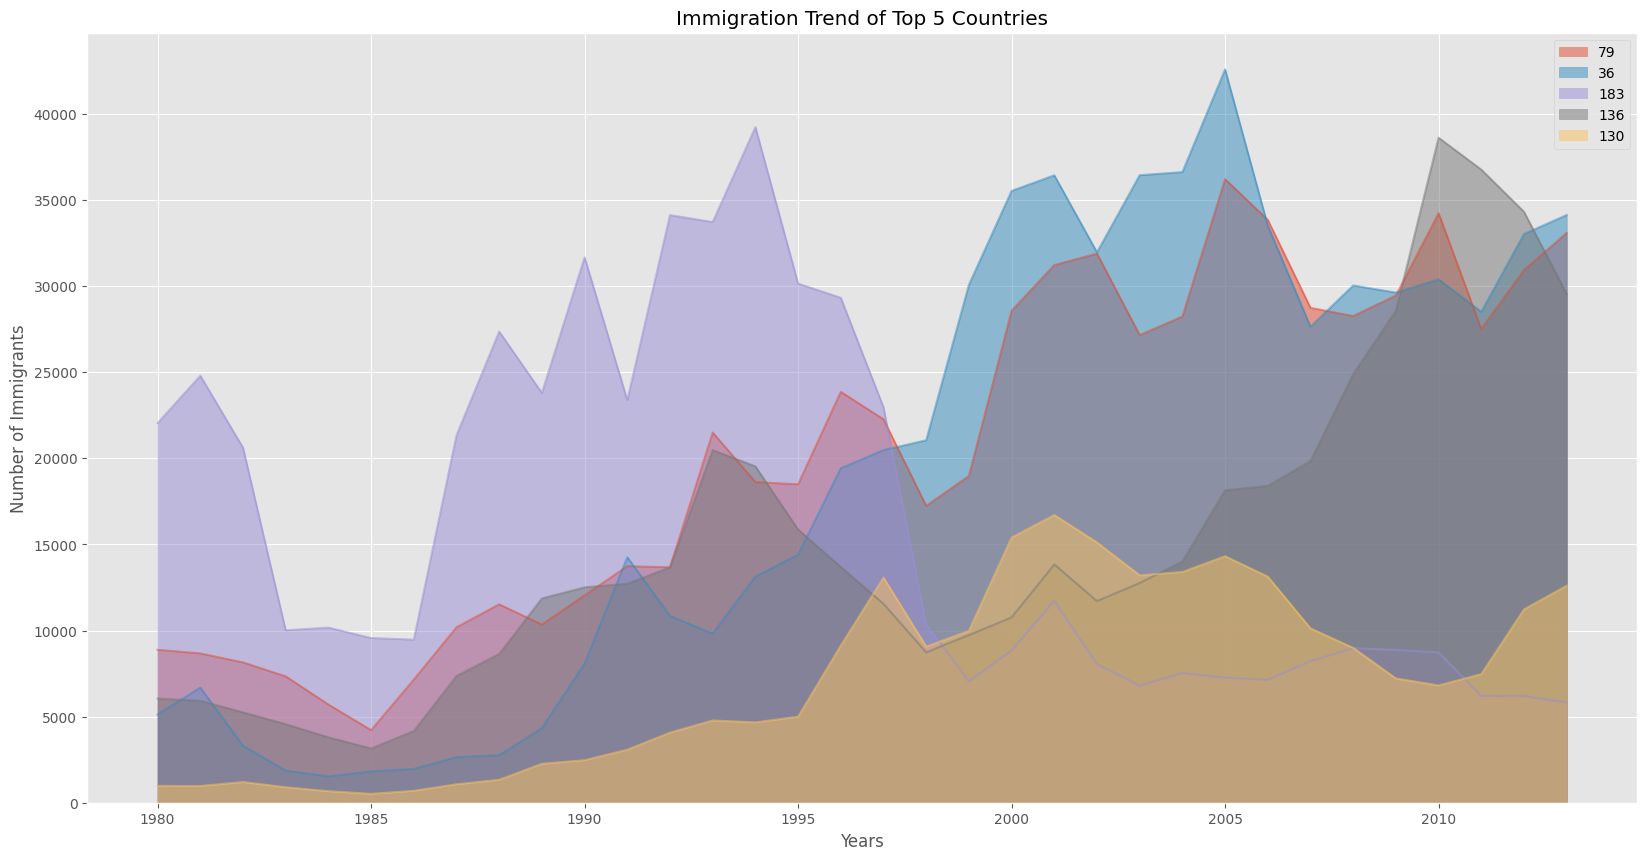

In [19]:
# let's change the index values of df_top5 to type integer for plotting
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

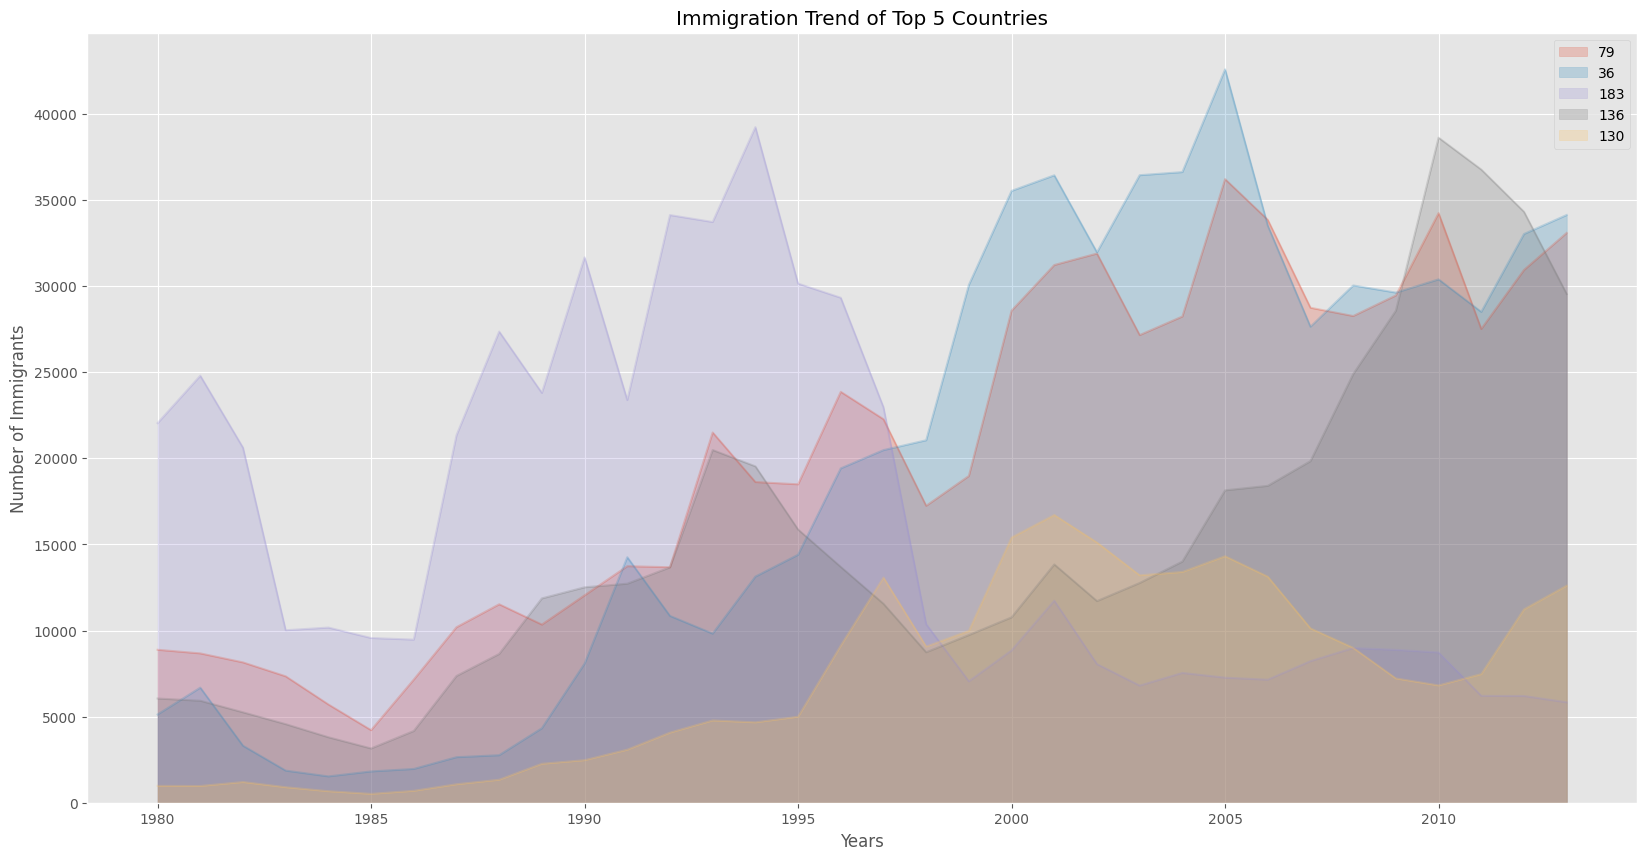

In [20]:
df_top5.plot(kind='area',
             alpha=0.25,  # 0 - 1, default value alpha = 0.5
             stacked=False,
             figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Text(0.5, 0, 'Years')

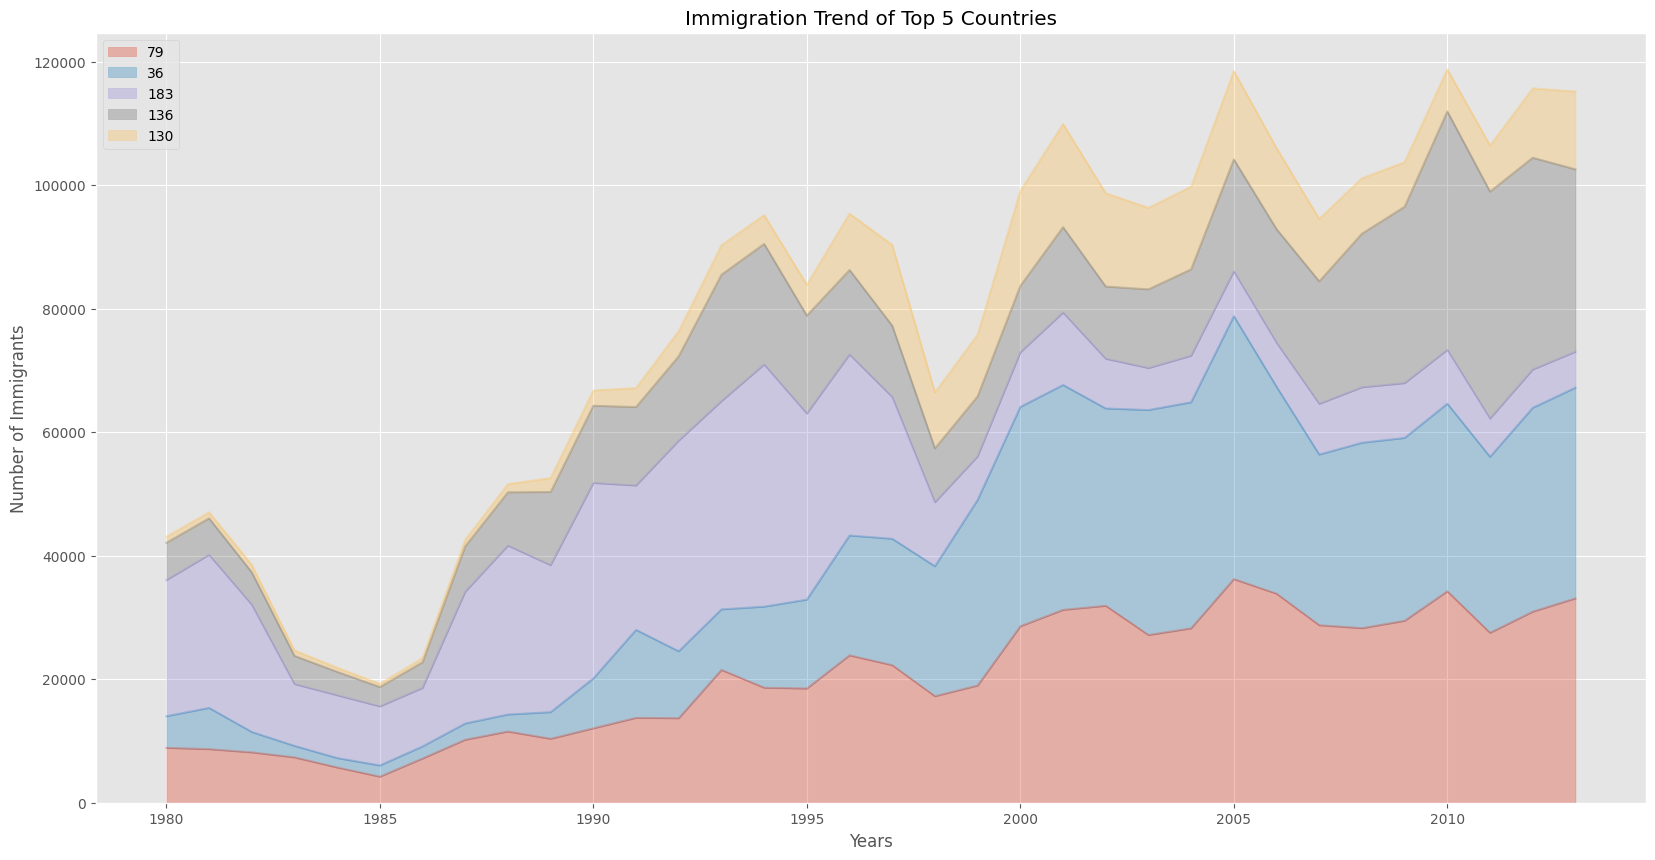

In [21]:
# option 2: preferred option with more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

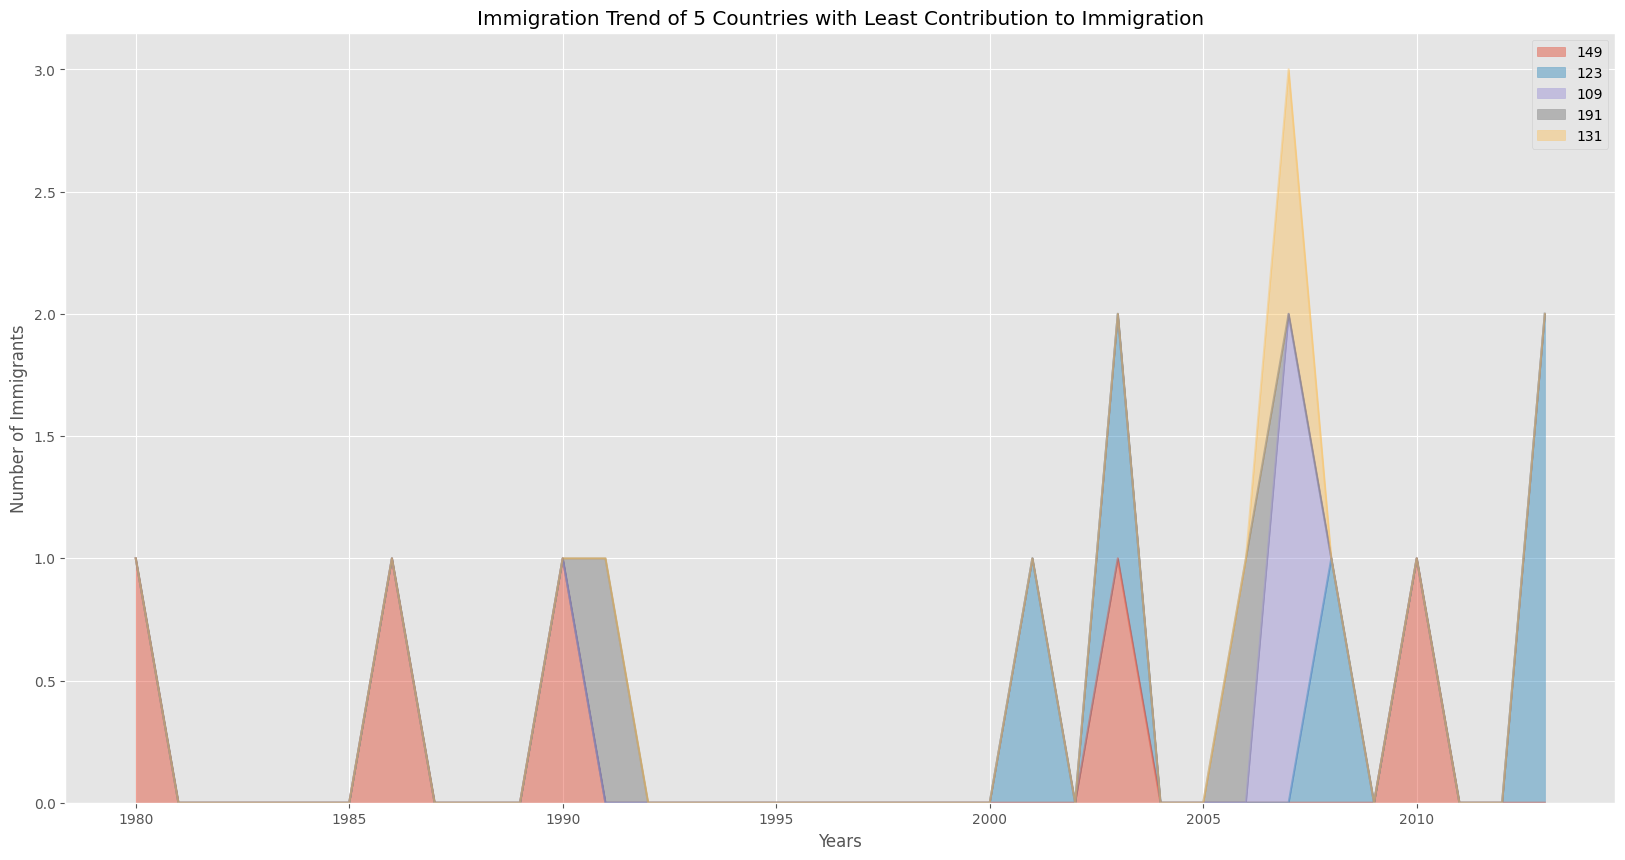

In [22]:
# prompt: Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45

import matplotlib.pyplot as plt
df_least5 = df_can.tail(5)
df_least5 = df_least5[years].transpose()
df_least5.index = df_least5.index.map(int)
df_least5.plot(kind='area',
             alpha=0.45,
             stacked=True,
             figsize=(20, 10))

plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()


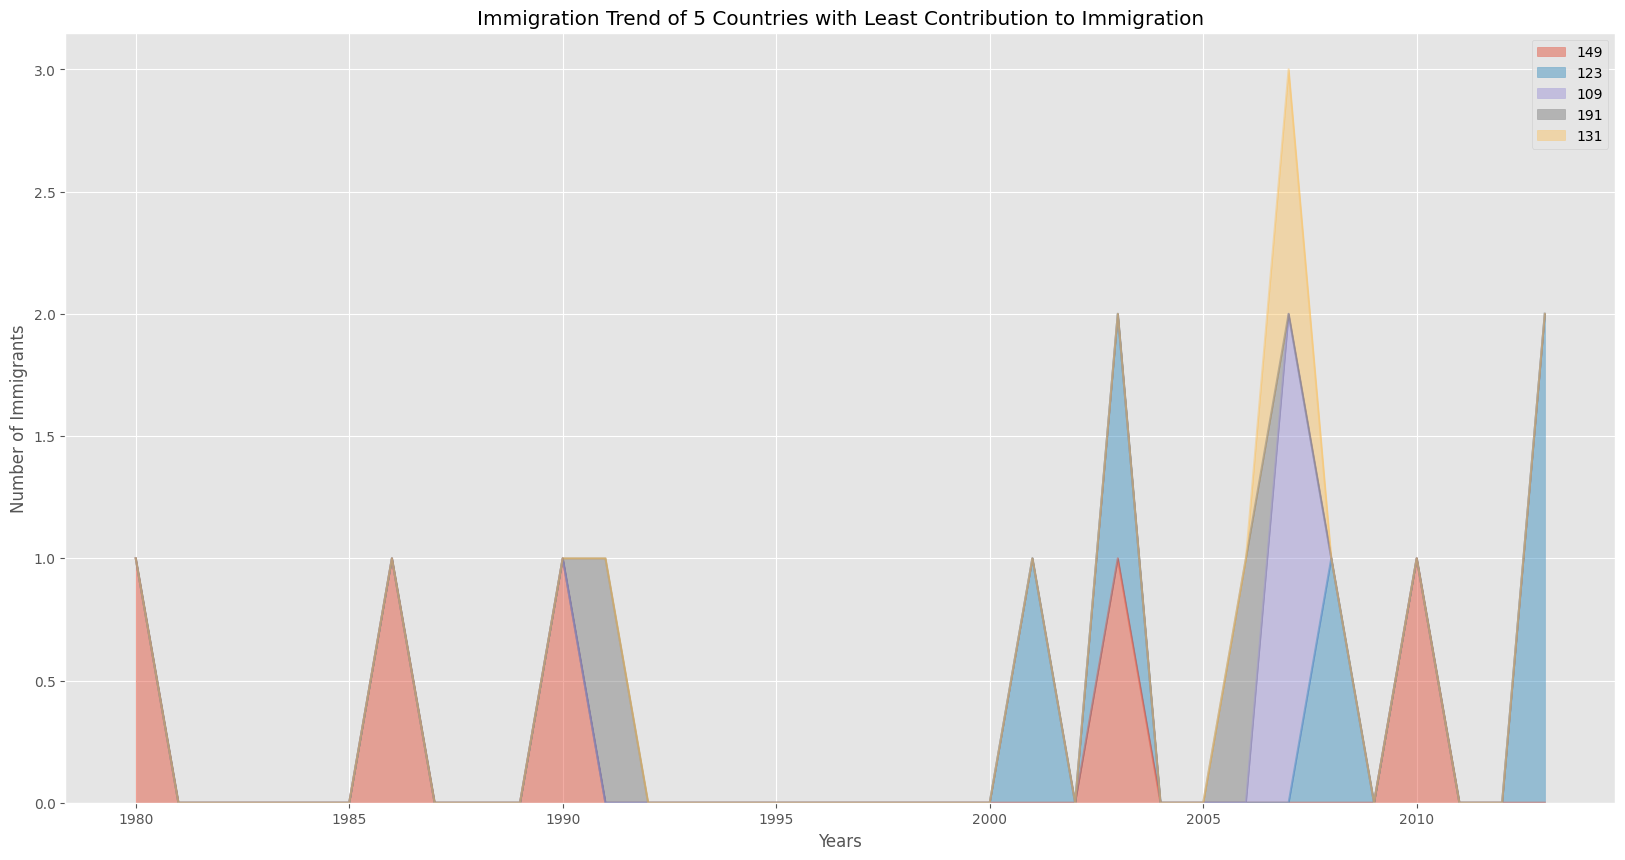

In [24]:
# get the 5 countries with the least contribution
df_least5 = df_can.tail(5)

    # transpose the dataframe
df_least5 = df_least5[years].transpose()
df_least5.head()

df_least5.index = df_least5.index.map(int) # let's change the index values of df_least5 to type integer for plotting
df_least5.plot(kind='area', alpha=0.45, figsize=(20, 10))

plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

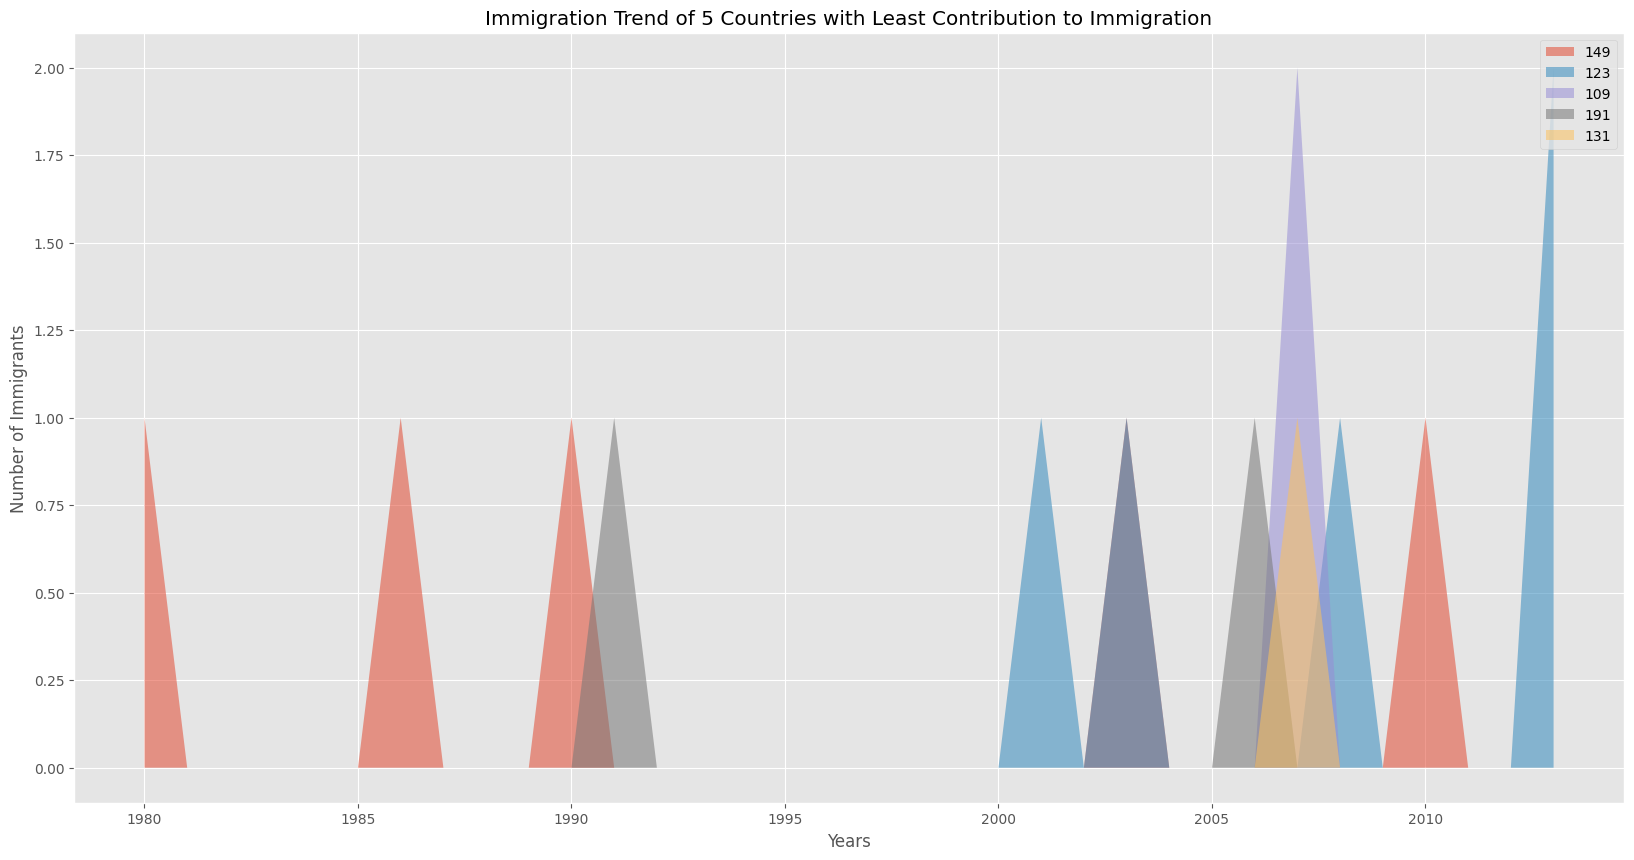

In [25]:
# prompt: Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.55

import matplotlib.pyplot as plt

# Get the 5 countries with the least contribution
df_least5 = df_can.tail(5)

# Transpose the dataframe
df_least5 = df_least5[years].transpose()

# Change the index values to type integer for plotting
df_least5.index = df_least5.index.map(int)

# Create the plot using the artist layer
fig, ax = plt.subplots(figsize=(20, 10))

for country in df_least5.columns:
  ax.fill_between(df_least5.index, 0, df_least5[country], alpha=0.55, label=country)

ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')
ax.legend()
plt.show()


Text(0.5, 0, 'Years')

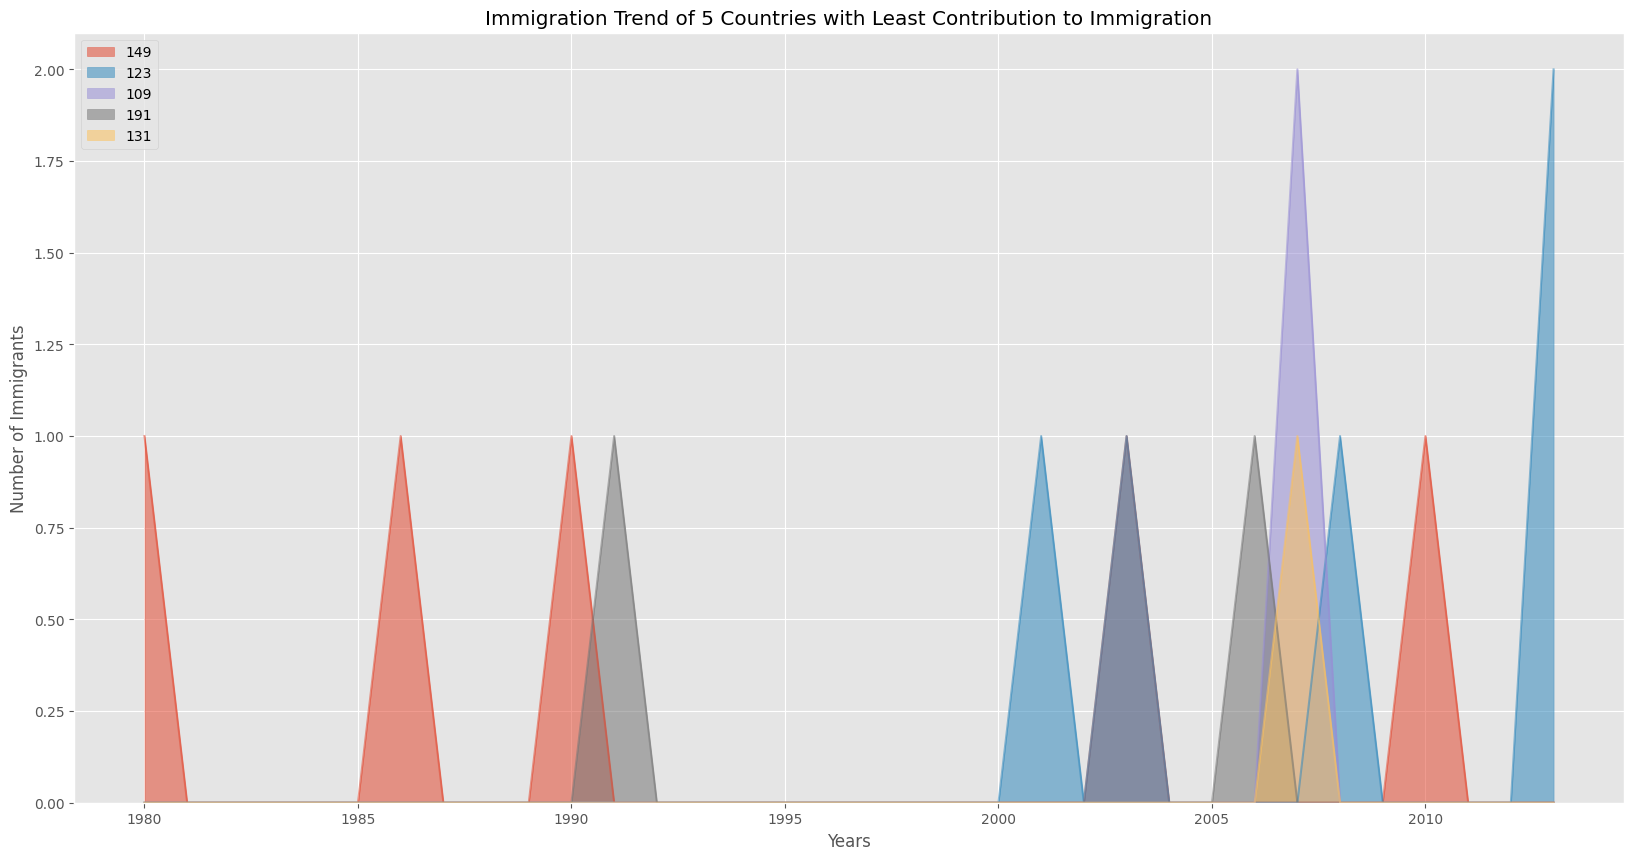

In [26]:
# get the 5 countries with the least contribution
df_least5 = df_can.tail(5)

    # transpose the dataframe
df_least5 = df_least5[years].transpose()

df_least5.head()

df_least5.index = df_least5.index.map(int) # let's change the index values of df_least5 to type integer for plotting

ax = df_least5.plot(kind='area', alpha=0.55, stacked=False, figsize=(20, 10))

ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

In [27]:
# let's quickly view the 2013 data
df_can['2013'].head()

,2013
79,33087
36,34129
183,5827
136,29544
130,12603


In [28]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


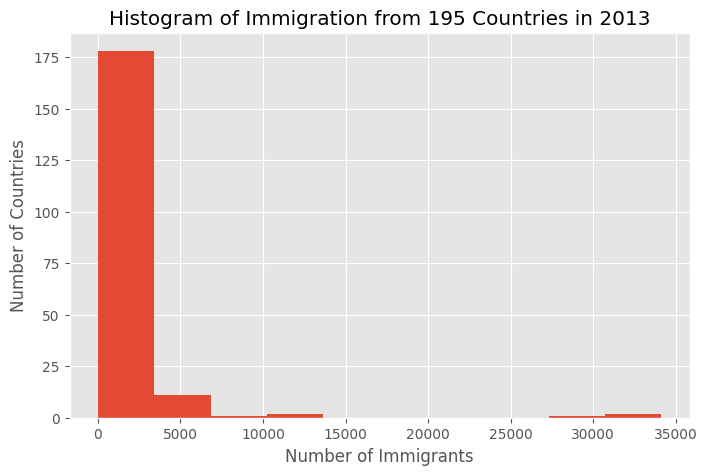

In [29]:
df_can['2013'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of Immigration from 195 Countries in 2013')
# add y-label
plt.ylabel('Number of Countries')
# add x-label
plt.xlabel('Number of Immigrants')

plt.show()

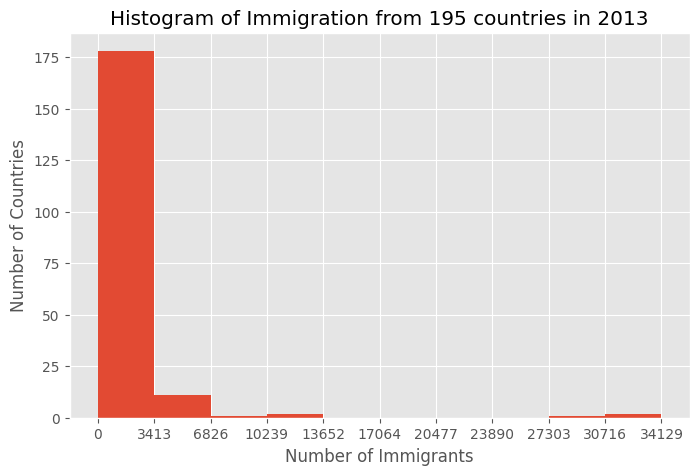

In [30]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

In [33]:
# let's quickly view the dataset
df_can.loc[df_can['Country'].isin(['Denmark', 'Norway', 'Sweden']), years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
167,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140
50,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
128,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59


<Axes: ylabel='Frequency'>

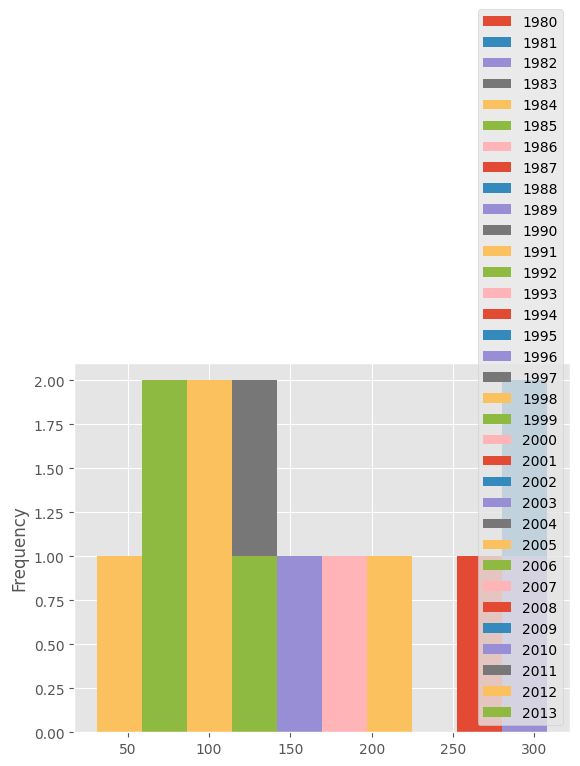

In [38]:
# generate histogram
df_can.loc[df_can['Country'].isin(['Denmark', 'Norway', 'Sweden']), years].plot.hist()

In [41]:
# transpose dataframe
df_t = df_can.loc[df_can['Country'].isin(['Denmark', 'Norway', 'Sweden']), years].transpose() # Select rows based on values in the "Country" column
df_t.head()

,167,50,128
1980,281,272,116
1981,308,293,77
1982,222,299,106
1983,176,106,51
1984,128,93,31


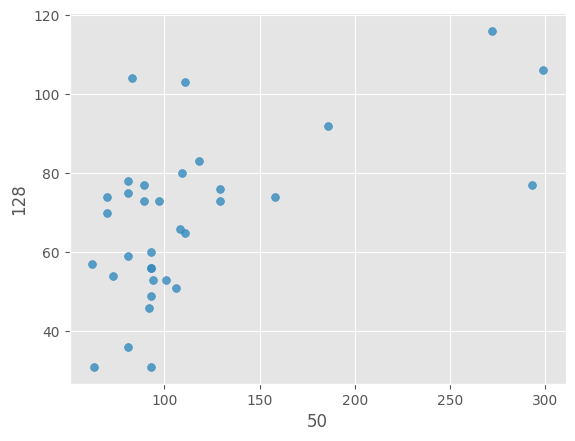

In [43]:
# @title 50 vs 128

from matplotlib import pyplot as plt
df_t.plot(kind='scatter', x=50, y=128, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

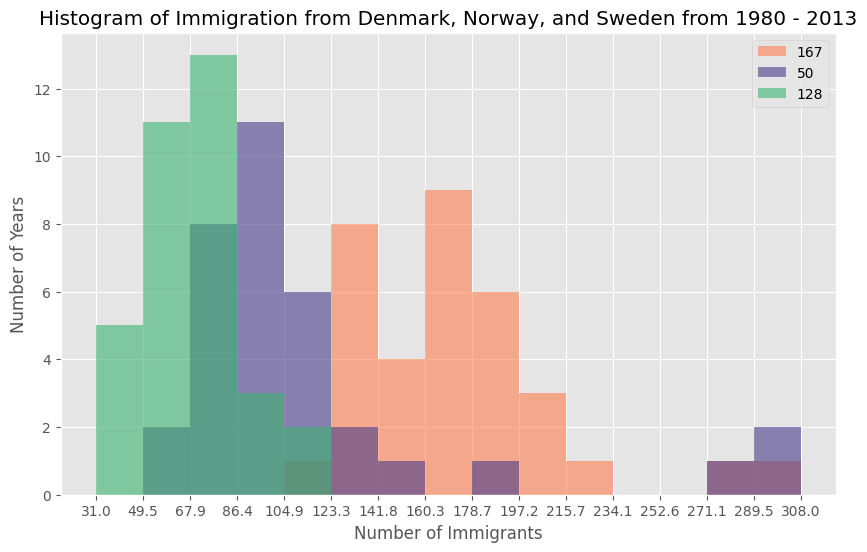

In [44]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist',
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

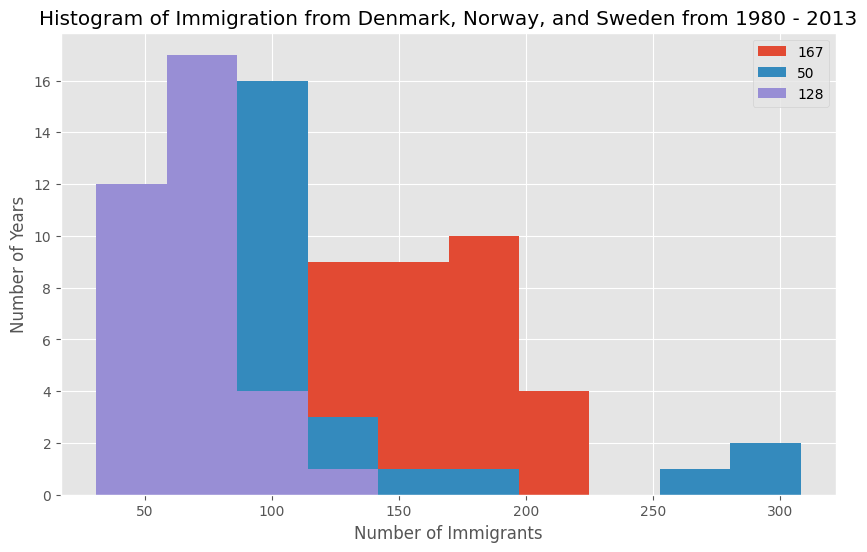

In [45]:
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

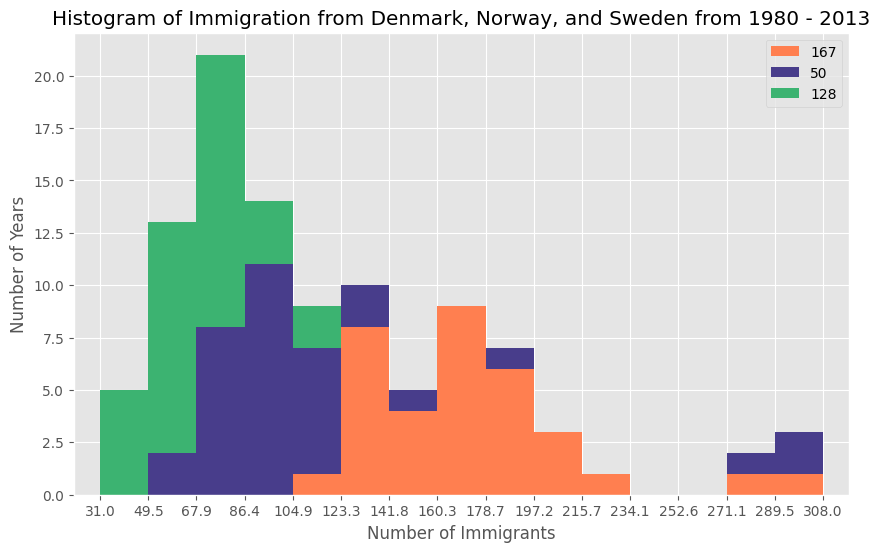

In [46]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6),
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

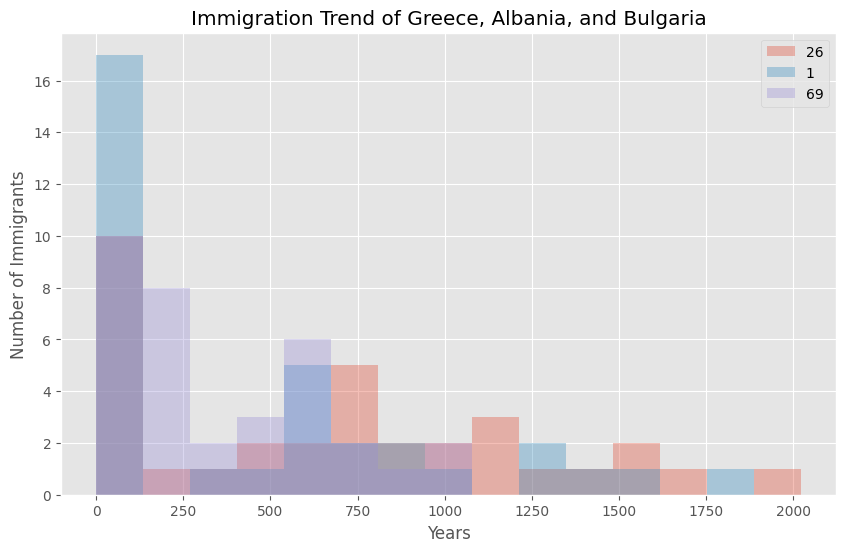

In [47]:
# prompt:  Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

import matplotlib.pyplot as plt
df_countries = df_can.loc[df_can['Country'].isin(['Greece', 'Albania', 'Bulgaria']), years].transpose()
df_countries.plot(kind='hist',
                 figsize=(10, 6),
                 bins=15,
                 alpha=0.35,
                 stacked=False)

plt.title('Immigration Trend of Greece, Albania, and Bulgaria')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()


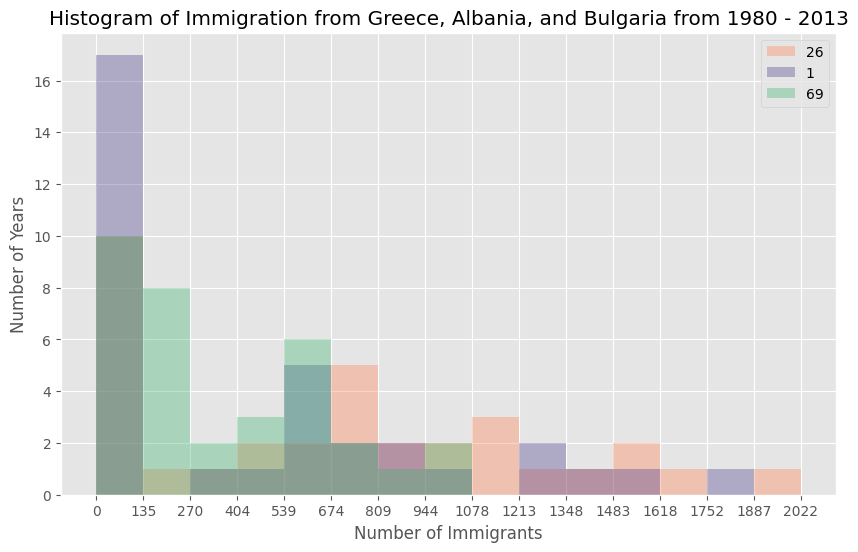

In [49]:
# create a dataframe of the countries of interest (cof)
df_cof = df_can.loc[df_can['Country'].isin(['Greece', 'Albania', 'Bulgaria']), years] # filter the dataframe based on the values in the 'Country' column

# transpose the dataframe
df_cof = df_cof.transpose()

# let's get the x-tick values
count, bin_edges = np.histogram(df_cof, 15)

# Un-stacked Histogram
df_cof.plot(kind ='hist',
                figsize=(10, 6),
                bins=15,
                alpha=0.35,
                xticks=bin_edges,
                color=['coral', 'darkslateblue', 'mediumseagreen']
                )

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [51]:
# step 1: get the data
df_iceland = df_can[df_can['Country'] == 'Iceland']
# Access the 'Iceland' row using boolean indexing on the 'Country' column
df_iceland = df_iceland.loc[:, years]
# Select all columns in the years list
df_iceland.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
78,17,33,10,9,13,6,11,11,7,3,...,23,10,2,15,13,15,30,38,42,72


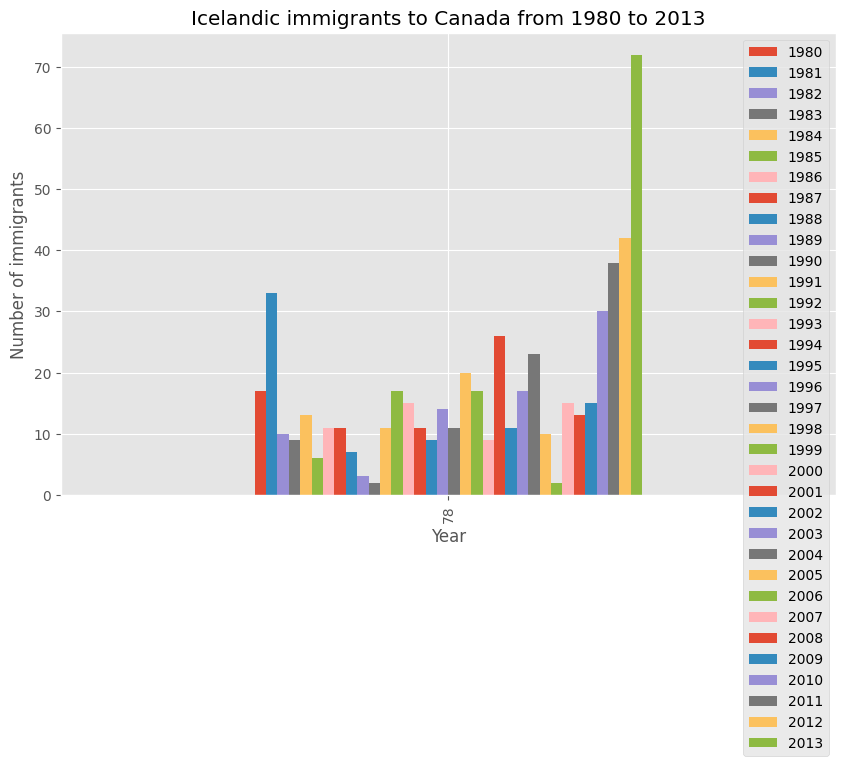

In [52]:
# step 2: plot data
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

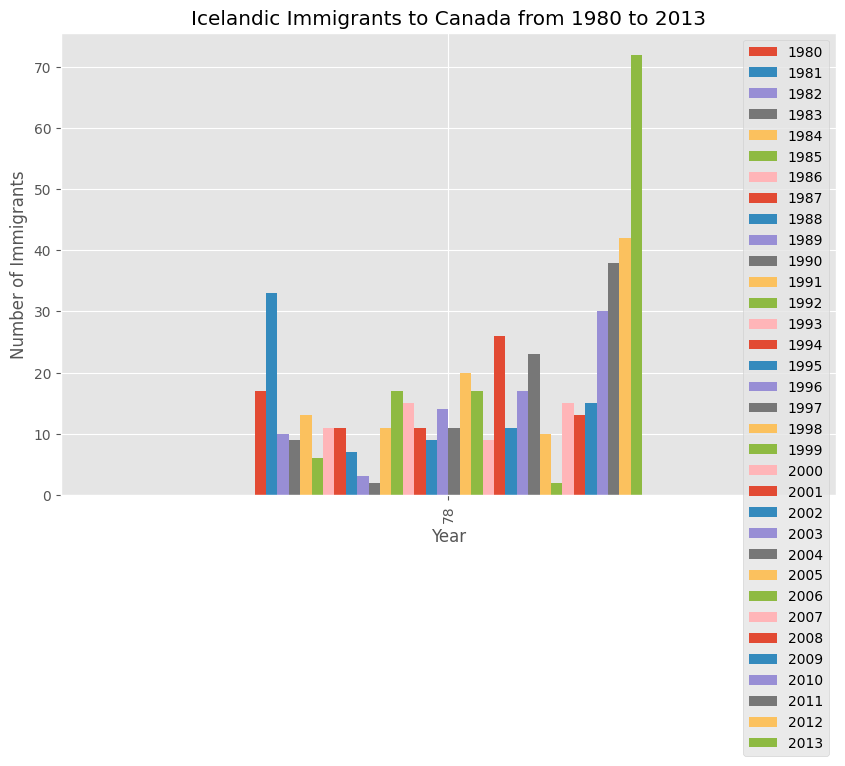

In [53]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)  # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()

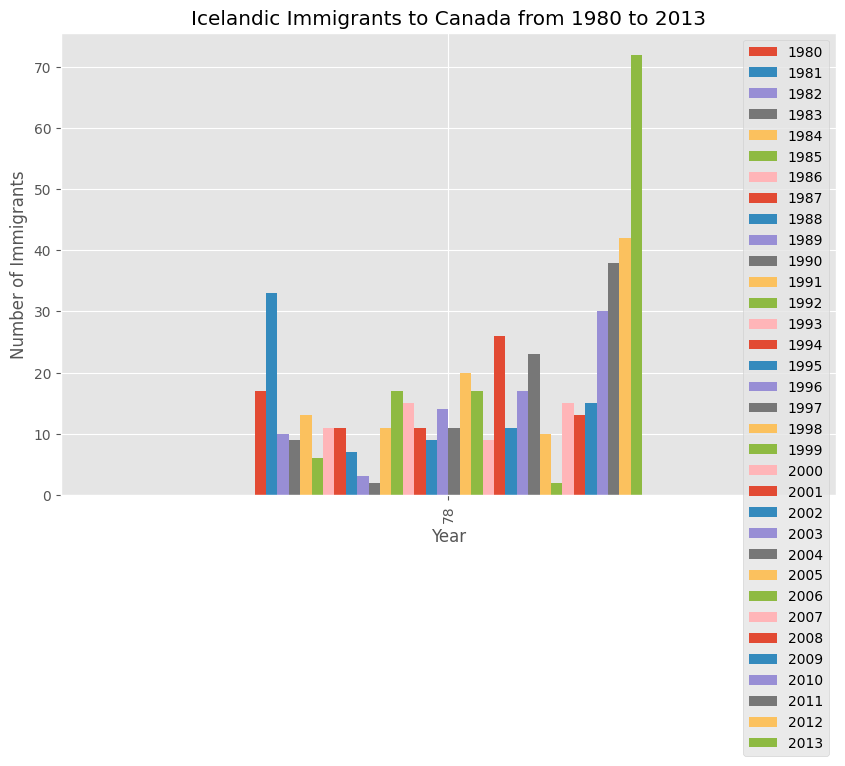

In [54]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

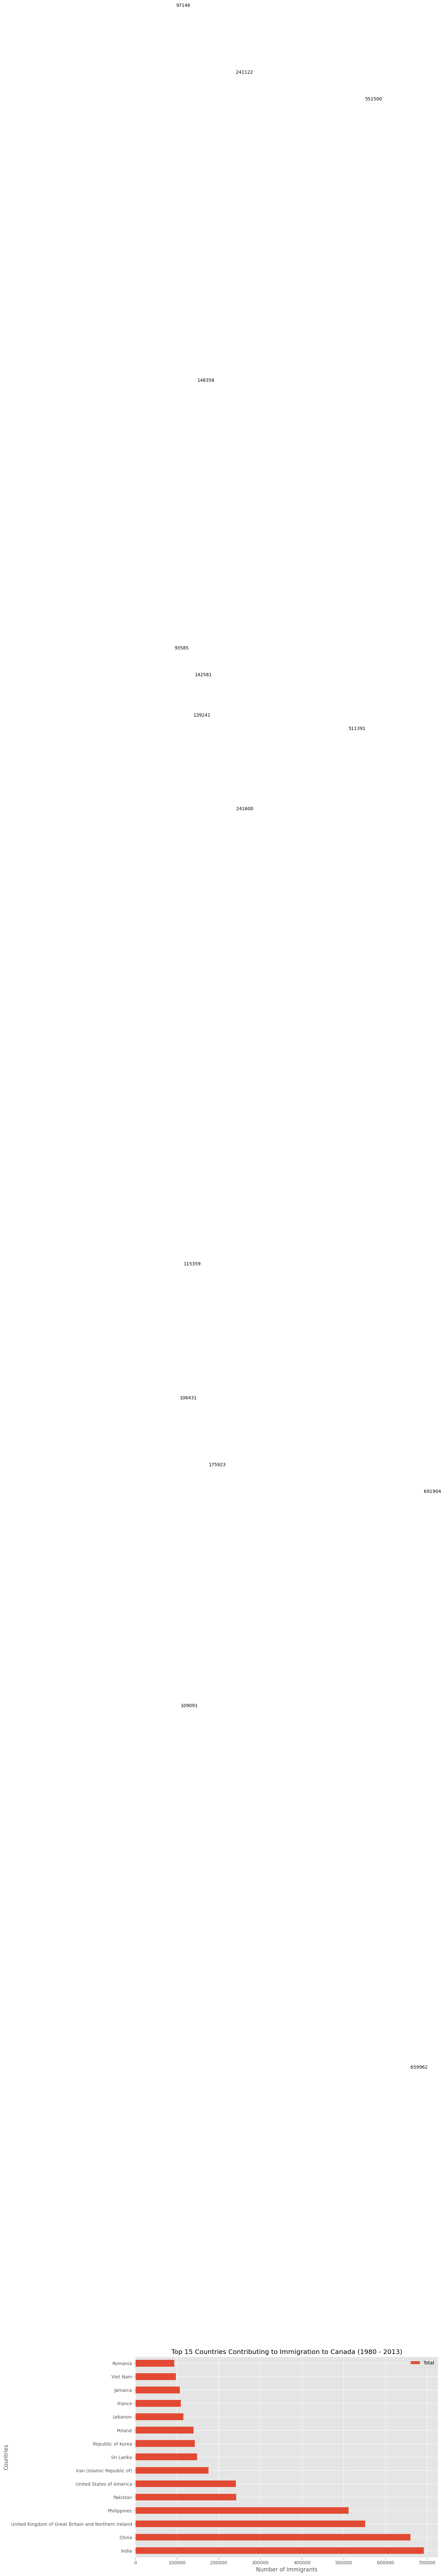

In [55]:
# prompt: Using the scripting later and the df_can dataset, create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

import matplotlib.pyplot as plt
# Sort the dataframe by 'Total' column in descending order to get the top 15 countries
df_top15 = df_can.sort_values(['Total'], ascending=False).head(15)

# Create the horizontal bar plot
df_top15.plot(kind='barh', figsize=(12, 8), x='Country', y='Total')

# Add labels for each country with the total immigrant count
for index, row in df_top15.iterrows():
  plt.text(row['Total'], index, str(row['Total']))


plt.xlabel('Number of Immigrants')
plt.ylabel('Countries')
plt.title('Top 15 Countries Contributing to Immigration to Canada (1980 - 2013)')

plt.show()


In [56]:
# sort dataframe on 'Total' column (descending)
df_can.sort_values(by='Total', ascending=True, inplace=True)

    # get top 15 countries
df_top15 = df_can['Total'].tail(15)
df_top15

,Total
142,93585
190,97146
86,106431
63,109091
96,115359
137,139241
140,142581
162,148358
81,175923
185,241122


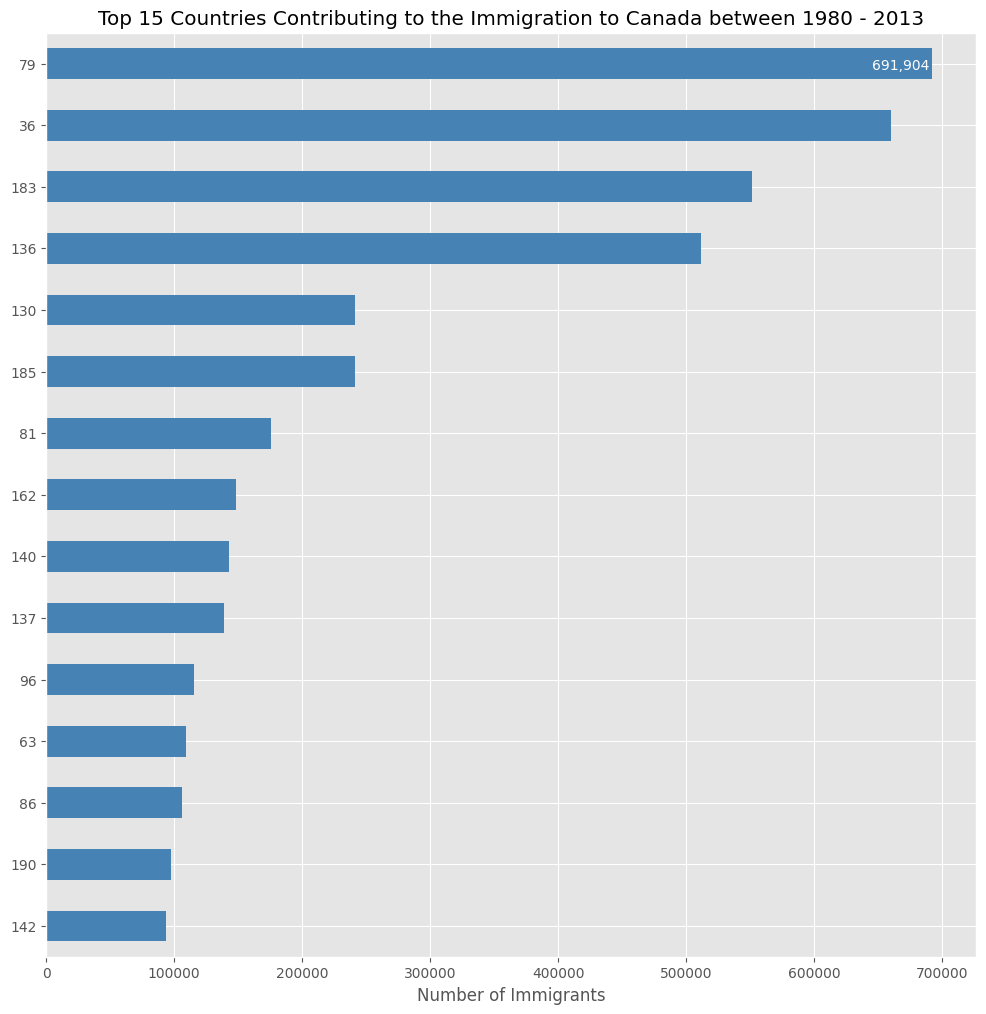

In [60]:
# generate plot
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Countries Contributing to the Immigration to Canada between 1980 - 2013')

    # annotate value labels to each country
for index, value in enumerate(df_top15):
        label = format(int(value), ',') # format int with commas

    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()